# Homework 3 Notebook

In [24]:
%precision 6
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from numpy import exp
from scipy import stats
from numpy.random import exponential, poisson, uniform
import pandas as pd

In [5]:
##### Functions #####
# Poisson process
poispr = lambda t, n, lmbd: stats.poisson.pmf(n, mu=t*lmbd)

## Simulating a poisson process

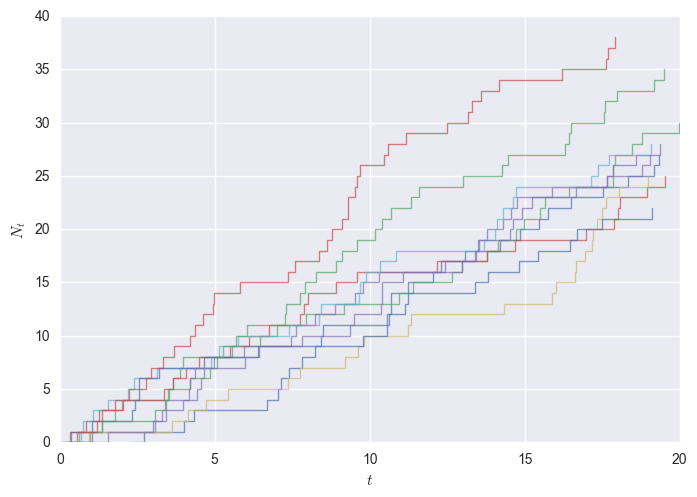

In [14]:
t = 20
lmbda = 1.5
for sim in range(10):
    Xt = poisson(lmbda*t)
    u = uniform(high=t, size=Xt); u.sort()
    plt.step(u, range(0, Xt), where="post", linewidth="1", alpha=0.7)
    plt.xlabel(r"$t$")
    plt.ylabel(r"$N_t$")
plt.show()

### 3)
**Let $\{N_t\}_{t\geq0}$ a *Poisson process* with $\lambda=4$**

**3.d Compute $\mathbb{P}(N_3 \leq 3)$**

In [3]:
sum([poispr(3, n, 4) for n in range(0, 3 + 1)])

0.002292

**3.e Compute $\mathbb{P}(N_1 > 3 \ | \ N_2 \geq 2)$**
$$
    \begin{split}
    \mathbb{P}(N_1 > 3 \ | \ N_2 \geq 2) &= \mathbb{P}(N_1 \geq 4 \ | \ N_2 \geq 2) \\
                                         & = \frac{\mathbb{P}(N_1 \geq 4, N_2 \geq 2)}{\mathbb{P}(N_2 \geq 2)} \\
                                         &= \frac{1}{\mathbb{P}(N_2 \geq 2)}\sum_{n=4}^{\infty}\sum_{k=2}^{\infty}\mathbb{P}(N_2 = k, N_1=n) \\
                                         &= \frac{1}{\mathbb{P}(N_2 \geq 2)}\sum_{n=4}^{\infty}\mathbb{P}(N_1=n)\sum_{k=2}^{\infty}\mathbb{P}(N_1 = k-n) \\
                                         &= \frac{1 - \mathbb{P}(N_1 \leq 3)}{1 - \mathbb{P}(N_1 \leq 1)}
    \end{split}
$$

In [20]:
# Theoretical Approximation
e3_ans_num = 1 - sum([poispr(1, n, 4) for n in range(0, 3+1)])
e3_ans_den = 1 - sum([poispr(2, n, 4) for n in range(0, 1+1)])

e3_ans_num / e3_ans_den

0.568246

In [19]:
# A second way to compute it (numerical Approximation)

num_prob = 0
for n in range(4, 101):
    PN1_1 = poispr(1, n, 4)
    for k in range(2, 101):
        PN1_2 = poispr(1, k-n, 4)
        num_prob += PN1_1 * PN1_2
        
num_prob /= (1 - sum([poispr(2, n, 4) for n in range(0, 2)])); num_prob

0.568246

------------
**3.f Compute $\mathbb{P}(N_3 \geq 4 | N_2 > 1)$**

$$
    \begin{split}
    \mathbb{P}(N_3 \geq 4 | N_2 > 1) &= \mathbb{P}(N_3 \geq 4 \ | \ N_2 \geq 2) \\
                                     &= \frac{1}{1 - \mathbb{P}(N_1 \leq 1)}\sum_{k=2}^{\infty}\left[\mathbb{P}(N_2 = k)\sum_{n=4}^{\infty}\mathbb{P}(N_1 = n-k)\right] \\
                                     &= \frac{1}{1 - \mathbb{P}(N_1 \leq 1)}\left[\mathbb{P}(N_2 = 2)[1 - \mathbb{P}(N_1=0) - \mathbb{P}(N_1=1)] + \\ \mathbb{P}(N_2 = 3)[1 - \mathbb{P}(N_1=0)] + \left(1 - \sum_{k=0}^{3}\mathbb{P}(N_2 = k)\right) \right]
    \end{split}
$$

Denote
$$A:= \mathbb{P}(N_2 = 2)[1 - \mathbb{P}(N_1=0) - \mathbb{P}(N_1=1)]$$

$$B:= \mathbb{P}(N_2 = 3)[1 - \mathbb{P}(N_1=0)]$$

$$C:= \left(1 - \sum_{k=0}^{3}\mathbb{P}(N_2 = k)\right)$$

In [24]:
lmda = 4

f3_ans_den = 1 - sum([poispr(2, n, lmda) for n in range(0, 1 + 1)])

A = poispr(2, 2, lmda)*(1 - poispr(1, 0, lmda) - poispr(1, 1, lmda))
B = poispr(2, 3, lmda) * (1 - poispr(1, 0, lmda))
C = 1 - sum([poispr(2, n, lmda) for n in range(0, 3 + 1)])

f3_ans = (A + B + C) / f3_ans_den; f3_ans

0.998488

In [28]:
f3_ans_num = 0
for k in range(2, 101):
    PN2 = poispr(2, k, lmda)
    for n in range(4, 101):
        PN1 = poispr(1, n-k, lmda)
        f3_ans_num += PN2 * PN1

f3_ans_num / f3_ans_den

0.998488

### 4)
**Let $\{N_t\}_{t\geq0}$ a poisson process with $\lambda = 1.5$**

**4.b) compute**
$$
    \mathbb{E}[W_7|W_5=4]
$$

In [568]:
# Numerical Approximation Approach
lmbda = 1.5
nsamples = 100000 
epsilon = 0.0005

samples = []

for samp in range(70):
    W5 = []
    W7 = []
    for s in range(nsamples):
        #W_sample = np.round(exponential(scale=1/lmbda, size=7), decimals=0)
        W_sample = exponential(scale=1/lmbda, size=7)
        W_sample = W_sample.cumsum()
        W5.append(W_sample[4])

        if 4 - epsilon < W_sample[4] < 4 + epsilon:
            W7.append(W_sample[6])
            
    samples.append(np.mean(W7))

W7 = np.array(W7)
W5 = np.array(W5)
print("E[W7|W5=4] ≈ {:.6f} (Gamma approx)".format(np.mean(samples)))

E[W7|W5=4] ≈ 5.320859 (Gamma approx)


In [569]:
t = 30
lmbda = 1.5
epsilon = 0.0005

samples = []
for samp in range(70):
    W7 = []
    for i in range(100000):
        Xt = poisson(lmbda*t)
        u = uniform(high=t, size=Xt); u.sort()
        
        if 4 - epsilon < u[4] < 4 + epsilon:
            W7.append(u[6])
    samples.append(np.mean(W7))
print("E[W7|W5=4] ≈ {:.6f} (Poisson approx)".format(np.mean(samples)))

E[W7|W5=4] ≈ 5.333296 (Poisson approx)


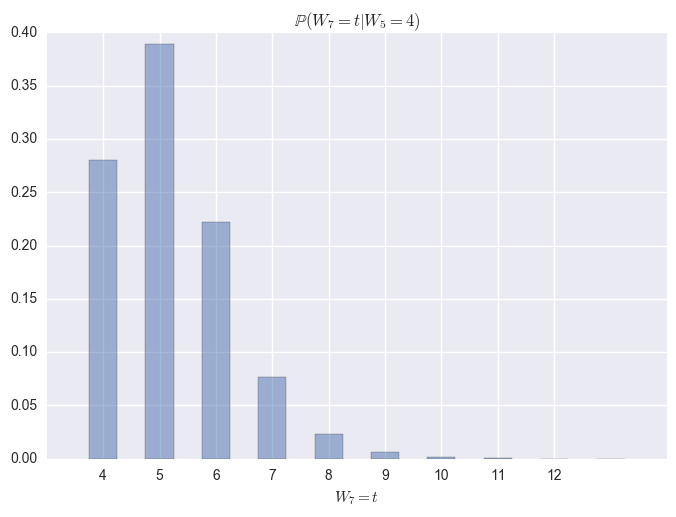

In [308]:
W7_freq = pd.value_counts(W7, normalize=True).sort_index()
plt.bar(W7_freq.index, W7_freq.values, alpha=0.5, width=0.5, align="center")
plt.title(r"$\mathbb{P}(W_7 = t | W_5 = 4)$")
plt.xlim(min(W7_freq.index)-1, max(W7_freq.index)+1)
plt.xticks(range(int(min(W7_freq.index)),int(max(W7_freq.index)),1))
plt.xlabel(r"$W_7 = t$")
plt.show()

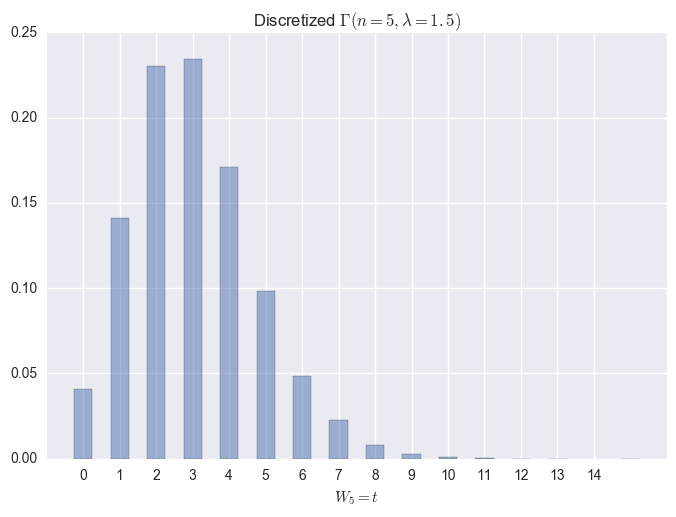

In [307]:
W5_freq = pd.value_counts(W5, normalize=True).sort_index()
plt.bar(W5_freq.index, W5_freq.values, alpha=0.5, width=0.5, align="center")
plt.title(r"Discretized $\Gamma(n=5,\lambda=1.5)$")
plt.xlim(min(W5_freq.index)-1, max(W5_freq.index)+1)
plt.xticks(range(0,int(max(W5_freq.index)),1))
plt.xlabel(r"$W_5 = t$")
plt.show()

## 7)
**The company "sucasita" opens at 11:00 and closes at 20:00. The clients arrive according to a non-homogenous poisson process with the following intensities:**

1. From 11:00 to 13:00 it increses linearly from 1 to 9 per hour;

2. from 13:00 to 15:00 it mantains linear at 9 per hour;

3. from 15:00 to 19:00 it decreases exponentially from 9 to 2 per hour;

4. Finally, it goes from 2 to 0 per hour

**Compute the distribution of the clients on a given day.**

In [59]:
def lambdaf(t):
    if t < 11 or t > 20:
        return 0
    
    elif 11 <= t < 13:
        return 4*t - 43
    
    elif 13 <= t < 15:
        return 9
    
    elif 15 <= t < 19:
        a = 7 / (exp(15) - exp(19))
        b = 9 - a * exp(15)
        return a * exp(t) + b
    
    elif 19 <= t <= 20:
        return 40 - 2 * t
    
lambdaf = np.vectorize(lambdaf)

In [60]:
lambdaf(20)

array(0)

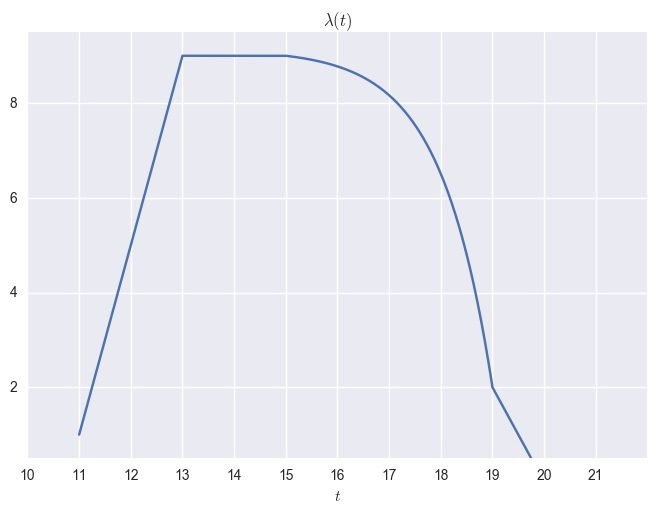

In [61]:
t = np.arange(11, 20.01, 0.01)
plt.plot(t, lambdaf(t))
plt.ylim(0.5, 9.5)
plt.title(r"$\lambda(t)$")
plt.xlabel("$t$")
plt.xticks(range(10,22))
plt.show()